In [1]:
import time
import numpy as np
import pandas as pd

# from scipy import sparse
from scipy.stats.mstats import gmean
from datetime import datetime
# from sklearn import preprocessing
# from scipy.stats import skew, boxcox,boxcox_normmax
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from bayes_opt import BayesianOptimization
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import xgboost as xgb

seed = 1234

# Load Data

In [2]:
train_y = np.ravel(pd.read_csv('../input/' + 'labels_BrandenMurray.csv'))

names = ['low_0','medium_0','high_0',
        'low_1','medium_1','high_1',
        'low_2','medium_2','high_2',
        'low_3','medium_3','high_3',
        'low_4','medium_4','high_4',
        'low_5','medium_5','high_5',
        'low_6','medium_6','high_6',
        'low_7','medium_7','high_7',
        'low_8','medium_8','high_8',
        'low_9','medium_9','high_9']

data_path = "../2ndlast/"
total_col = 0

In [3]:
# RFC 1st level 
file_train      = 'train_blend_RFC_entropy_last_2017-04-21-11-06' + '.csv'
file_test_mean  = 'test_blend_RFC_entropy_mean_last_2017-04-21-11-06' + '.csv'

train_rfc = pd.read_csv(data_path + file_train,      header = None)
test_rfc  = pd.read_csv(data_path + file_test_mean,  header = None)


n_column = train_rfc.shape[1]
total_col += n_column

train_rfc.columns = ['rfc_' + x for x in names[:n_column]]
test_rfc.columns  = ['rfc_' + x for x in names[:n_column]]


print train_rfc.iloc[:5,:3]

print test_rfc.iloc[:5,:3]

   rfc_low_0  rfc_medium_0  rfc_high_0
0   0.355361      0.544070    0.100569
1   0.508303      0.446720    0.044978
2   0.603091      0.349880    0.047029
3   0.616221      0.328639    0.055140
4   0.947230      0.049863    0.002907
   rfc_low_0  rfc_medium_0  rfc_high_0
0   0.288217      0.532268    0.179515
1   0.970891      0.025801    0.003308
2   0.908912      0.078535    0.012553
3   0.400539      0.476918    0.122542
4   0.700470      0.269945    0.029586


In [4]:
# LR 1st level
file_train      = 'train_blend_LR_last_2017-04-21-11-16' + '.csv'
file_test_mean  = 'test_blend_LR_mean_last_2017-04-21-11-16' + '.csv'

train_LR = pd.read_csv(data_path + file_train, header = None)
test_LR  = pd.read_csv(data_path + file_test_mean, header = None)

n_column = train_LR.shape[1]
total_col += n_column

train_LR.columns = ['LR_' + x for x in names[:n_column]]
test_LR.columns  = ['LR_' + x for x in names[:n_column]]

print train_LR.iloc[:5,:3]
print test_LR.iloc[:5,:3]

   LR_low_0  LR_medium_0  LR_high_0
0  0.259359     0.652577   0.088065
1  0.738646     0.234238   0.027115
2  0.396965     0.512991   0.090045
3  0.647052     0.312537   0.040412
4  0.923203     0.072255   0.004543
   LR_low_0  LR_medium_0  LR_high_0
0  0.282172     0.549423   0.168405
1  0.955532     0.040091   0.004377
2  0.925692     0.065197   0.009112
3  0.631038     0.309690   0.059272
4  0.803117     0.187725   0.009158


In [5]:
# ET 1st level
file_train      = 'train_blend_ET_entropy_last_2017-04-21-11-48' + '.csv'
file_test_mean  = 'test_blend_ET_entropy_mean_last_2017-04-21-11-48' + '.csv'

train_ET = pd.read_csv(data_path + file_train,      header = None)
test_ET  = pd.read_csv(data_path + file_test_mean,  header = None)

n_column = train_ET.shape[1]
total_col += n_column

train_ET.columns = ['ET_' + x for x in names[:n_column]]
test_ET.columns  = ['ET_' + x for x in names[:n_column]]

print train_ET.iloc[:5,:3]
print test_ET.iloc[:5,:3]

   ET_low_0  ET_medium_0  ET_high_0
0  0.332903     0.538085   0.129012
1  0.471780     0.454812   0.073408
2  0.582223     0.383893   0.033884
3  0.622462     0.328557   0.048981
4  0.926402     0.064996   0.008602
   ET_low_0  ET_medium_0  ET_high_0
0  0.309822     0.527181   0.162997
1  0.984336     0.014059   0.001605
2  0.956579     0.038080   0.005341
3  0.518490     0.384524   0.096986
4  0.759357     0.210049   0.030594


In [6]:
# KNN 1st level
file_train      = 'train_blend_KNN_uniform_last_2017-04-21-13-53' + '.csv'
file_test_mean  = 'test_blend_KNN_uniform_mean_last_2017-04-21-13-53' + '.csv'


train_KNN = pd.read_csv(data_path + file_train,      header = None)
test_KNN  = pd.read_csv(data_path + file_test_mean,  header = None)


n_column = train_KNN.shape[1]
total_col += n_column

train_KNN.columns      = ['KNN_uniform_' + x for x in names[:n_column]]
test_KNN.columns  = ['KNN_uniform_' + x for x in names[:n_column]]

print train_KNN.iloc[:5,:3]
print test_KNN.iloc[:5,:3]

   KNN_uniform_low_0  KNN_uniform_medium_0  KNN_uniform_high_0
0           0.507812              0.390625            0.101562
1           0.531250              0.359375            0.109375
2           0.671875              0.273438            0.054688
3           0.609375              0.250000            0.140625
4           0.843750              0.140625            0.015625
   KNN_uniform_low_0  KNN_uniform_medium_0  KNN_uniform_high_0
0           0.381250              0.457813            0.160938
1           0.968750              0.031250            0.000000
2           0.970313              0.029687            0.000000
3           0.693750              0.259375            0.046875
4           0.612500              0.321875            0.065625


In [7]:
# TFFM 1st level 0322
file_train      = 'train_blend_FM_BM_0322_2017-03-27-04-35' + '.csv'
file_test_mean  = 'test_blend_FM_mean_BM_0322_2017-03-27-04-35' + '.csv'

train_FM_0322      = pd.read_csv(data_path + file_train,      header = None)
test_FM_mean_0322  = pd.read_csv(data_path + file_test_mean,  header = None)

n_column = train_FM_0322.shape[1]
total_col += n_column

train_FM_0322.columns      = ['FM_0322_' + x for x in names[:n_column]]
test_FM_mean_0322.columns  = ['FM_0322_' + x for x in names[:n_column]]

print train_FM_0322.iloc[:5,:3]
print test_FM_mean_0322.iloc[:5,:3]

   FM_0322_low_0  FM_0322_medium_0  FM_0322_high_0
0       0.460187          0.436036        0.103776
1       0.268598          0.571916        0.159486
2       0.724799          0.239351        0.035851
3       0.669683          0.286716        0.043600
4       0.917878          0.073469        0.008653
   FM_0322_low_0  FM_0322_medium_0  FM_0322_high_0
0       0.449136          0.411890        0.138974
1       0.971615          0.020319        0.008066
2       0.909864          0.074040        0.016096
3       0.661175          0.269026        0.069799
4       0.705851          0.263069        0.031080


In [8]:
# Multinomial Naive Bayes 1st level
file_train      = 'train_blend_MNB_BM_MB_last_2017-04-21-14-02' + '.csv'
file_test_mean  = 'test_blend_MNB_mean_BM_MB_last_2017-04-21-14-02' + '.csv'


train_MNB      = pd.read_csv(data_path + file_train,      header = None)
test_MNB_mean  = pd.read_csv(data_path + file_test_mean,  header = None)


n_column = train_MNB.shape[1]
total_col += n_column

train_MNB.columns      = ['MNB_' + x for x in names[:n_column]]
test_MNB_mean.columns  = ['MNB_' + x for x in names[:n_column]]

print train_MNB.iloc[:5,:3]
print test_MNB_mean.iloc[:5,:3]

   MNB_low_0  MNB_medium_0  MNB_high_0
0   0.216985      0.579031    0.203985
1   0.560375      0.382293    0.057331
2   0.621019      0.332482    0.046499
3   0.312441      0.345115    0.342444
4   0.901678      0.090035    0.008287
   MNB_low_0  MNB_medium_0  MNB_high_0
0   0.218456      0.591575    0.189969
1   0.992103      0.007102    0.000795
2   0.971220      0.025168    0.003612
3   0.501988      0.411198    0.086813
4   0.754496      0.213158    0.032347


In [9]:
# TSNE 1st level

file_train = 'X_train_tsne_BM_MB_add_desc_2017-03-18-17-14' + '.csv'
file_test  = 'X_test_tsne_BM_MB_add_desc_2017-03-18-17-14' + '.csv'

train_tsne = pd.read_csv(data_path + file_train, header = None)
test_tsne  = pd.read_csv(data_path + file_test, header = None)


n_column = train_tsne.shape[1]
total_col += n_column

train_tsne.columns = ['tsne_0', 'tsne_1', 'tsne_2']
test_tsne.columns  = ['tsne_0', 'tsne_1', 'tsne_2']


print train_tsne.iloc[:5,:3]
print test_tsne.iloc[:5,:3]

      tsne_0     tsne_1    tsne_2
0  -8.398991  -2.415894 -3.602143
1   0.698237   0.335786  8.884257
2  -5.811380 -16.669975  7.145837
3  -0.371861 -25.894747 -2.076309
4 -15.371799   9.656209  5.813590
      tsne_0     tsne_1     tsne_2
0  -5.176846  -0.768422  -2.339259
1   9.003089  13.250301  -0.707032
2   4.188036  14.397186   4.573307
3  10.890132 -12.660774 -13.414140
4   6.011381   5.177731  15.669250


In [10]:
# TSNE 1st level 0322

file_train = 'X_train_tsne_BM_0322_2017-03-26-16-33' + '.csv'
file_test  = 'X_test_tsne_BM_0322_2017-03-26-16-33' + '.csv'

train_tsne_0322 = pd.read_csv(data_path + file_train, header = None)
test_tsne_0322  = pd.read_csv(data_path + file_test, header = None)

n_column = train_tsne_0322.shape[1]
total_col += n_column

train_tsne_0322.columns = ['tsne_0_0322', 'tsne_1_0322', 'tsne_2_0322']
test_tsne_0322.columns  = ['tsne_0_0322', 'tsne_1_0322', 'tsne_2_0322']

print train_tsne_0322.iloc[:5,:3]
print test_tsne_0322.iloc[:5,:3]

   tsne_0_0322  tsne_1_0322  tsne_2_0322
0    -6.649132    13.028168     8.329733
1     7.615566     0.067456   -14.932181
2     8.333528     8.561174   -13.536297
3    12.819587   -20.027314     0.661660
4    -5.513088    -5.609218    17.130673
   tsne_0_0322  tsne_1_0322  tsne_2_0322
0    -5.721674     7.011411    -6.499047
1     8.238390    -8.589710    13.771045
2   -11.383577   -16.071395    15.083511
3    -6.111491     6.348311   -10.222012
4     4.426022    15.553415    11.315777


In [11]:
# XGB 1st level

file_train     = 'train_blend_XGB_BM_2bagging_CV_MS_52571_2017-04-20-23-06' + '.csv'
file_test_mean = 'test_blend_XGB_BM_2bagging_CV_MS_52571_2017-04-20-23-06' + '.csv'


train_xgb      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean  = pd.read_csv(data_path + file_test_mean, header = None)

tmp_train = train_xgb*2
tmp_test  = test_xgb_mean*2

file_train     = 'train_blend_XGB_BM_20bagging_last_2017-04-21-19-08' + '.csv'
file_test_mean = 'test_blend_XGB_BM_20bagging_last_2017-04-21-19-08' + '.csv'

train_xgb      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean  = pd.read_csv(data_path + file_test_mean, header = None)

train_xgb      = (tmp_train + train_xgb*20) / 22.0
test_xgb_mean  = (tmp_test + test_xgb_mean*20) / 22.0

n_column = train_xgb.shape[1]
total_col += n_column

train_xgb.columns = ['xgb_' + x for x in names[:n_column]]
test_xgb_mean.columns = ['xgb_' + x for x in names[:n_column]]

print train_xgb.iloc[:5,:3]
print test_xgb_mean.iloc[:5,:3]

   xgb_low_0  xgb_medium_0  xgb_high_0
0   0.338520      0.631375    0.030105
1   0.563156      0.390819    0.046025
2   0.462242      0.498429    0.039328
3   0.930174      0.067369    0.002458
4   0.892201      0.106567    0.001232
   xgb_low_0  xgb_medium_0  xgb_high_0
0   0.178073      0.621011    0.200916
1   0.978270      0.012231    0.009499
2   0.939539      0.055440    0.005021
3   0.151284      0.616193    0.232523
4   0.698756      0.292996    0.008247


In [12]:
# XGB 1st level 30fold

file_train      = 'train_blend_XGB_last_30fold_2017-04-21-12-57' + '.csv'
file_test_mean  = 'test_blend_XGB_last_30fold_2017-04-21-12-57' + '.csv'


train_xgb_30fold      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_30fold  = pd.read_csv(data_path + file_test_mean, header = None)


n_column = train_xgb_30fold.shape[1]
total_col += n_column

train_xgb_30fold.columns      = ['xgb_30fold_' + x for x in names[:n_column]]
test_xgb_mean_30fold.columns  = ['xgb_30fold_' + x for x in names[:n_column]]

print train_xgb_30fold.iloc[:5,:3]
print test_xgb_mean_30fold.iloc[:5,:3]

   xgb_30fold_low_0  xgb_30fold_medium_0  xgb_30fold_high_0
0          0.309433             0.660416           0.030151
1          0.565861             0.382300           0.051838
2          0.401785             0.566253           0.031961
3          0.931191             0.066339           0.002470
4          0.881444             0.117002           0.001555
   xgb_30fold_low_0  xgb_30fold_medium_0  xgb_30fold_high_0
0          0.174706             0.640575           0.184719
1          0.977405             0.013037           0.009558
2          0.944000             0.051268           0.004732
3          0.145425             0.592400           0.262175
4          0.670348             0.322061           0.007591


In [13]:
# XGB one vs rest 1st level

file_train      = 'train_blend_xgb_ovr_last_2017-04-21-10-09' + '.csv'
file_test_mean  = 'test_blend_xgb_ovr_mean_last_2017-04-21-10-09' + '.csv'

train_xgb_ovr      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_ovr  = pd.read_csv(data_path + file_test_mean, header = None)


n_column = train_xgb_ovr.shape[1]
total_col += n_column

train_xgb_ovr.columns      = ['xgb_ovr_' + x for x in names[:n_column]]
test_xgb_mean_ovr.columns  = ['xgb_ovr_' + x for x in names[:n_column]]

sum_train = np.sum(train_xgb_ovr,axis=1)
sum_test  = np.sum(test_xgb_mean_ovr,axis=1)

for col in train_xgb_ovr.columns.values:
    train_xgb_ovr[col] = train_xgb_ovr[col] / sum_train
    test_xgb_mean_ovr[col] = test_xgb_mean_ovr[col] / sum_test


print train_xgb_ovr.iloc[:5,:3]
print test_xgb_mean_ovr.iloc[:5,:3]

   xgb_ovr_low_0  xgb_ovr_medium_0  xgb_ovr_high_0
0       0.313141          0.658802        0.028057
1       0.491897          0.450891        0.057212
2       0.486618          0.486574        0.026809
3       0.925839          0.071295        0.002866
4       0.863436          0.134349        0.002214
   xgb_ovr_low_0  xgb_ovr_medium_0  xgb_ovr_high_0
0       0.167358          0.646104        0.186538
1       0.981203          0.010042        0.008756
2       0.906588          0.088855        0.004558
3       0.167107          0.602472        0.230421
4       0.716008          0.274903        0.009089


In [14]:
# LightGBM 1st level

file_train      = 'train_blend_LightGBM_last_10bagging_2017-04-21-21-54' + '.csv'
file_test_mean  = 'test_blend_LightGBM_mean_last_10bagging_2017-04-21-21-54' + '.csv'


train_lgb      = pd.read_csv(data_path + file_train, header = None)
test_lgb_mean  = pd.read_csv(data_path + file_test_mean, header = None)

n_column = train_lgb.shape[1]
total_col += n_column

train_lgb.columns      = ['lgb_10bag_' + x for x in names[:n_column]]
test_lgb_mean.columns  = ['lgb_10bag_' + x for x in names[:n_column]]

print train_lgb.iloc[:5,:3]
print test_lgb_mean.iloc[:5,:3]

   lgb_10bag_low_0  lgb_10bag_medium_0  lgb_10bag_high_0
0         0.317617            0.650112          0.032271
1         0.597390            0.386899          0.015711
2         0.450143            0.517132          0.032726
3         0.898037            0.100391          0.001572
4         0.880435            0.118283          0.001282
   lgb_10bag_low_0  lgb_10bag_medium_0  lgb_10bag_high_0
0         0.186506            0.567313          0.246180
1         0.964578            0.025110          0.010312
2         0.913688            0.080543          0.005769
3         0.114846            0.657136          0.228019
4         0.650263            0.344835          0.004902


In [15]:
# Keras 1st level No.1

file_train      = 'train_blend_Keras_last_2017-04-20-21-23' + '.csv'
file_test_mean  = 'test_blend_Keras_mean_last_2017-04-20-21-23' + '.csv'


tmp_train = pd.read_csv(data_path + file_train, header = None)
tmp_test  = pd.read_csv(data_path + file_test_mean, header = None)

train_nn     = tmp_train[[0, 1, 2]]+(tmp_train[[3, 4, 5]]).rename(columns = {3:0,4:1,5:2})
test_nn_mean = tmp_test[[0, 1, 2]]+(tmp_test[[3, 4, 5]]).rename(columns = {3:0,4:1,5:2})

file_train      = 'train_blend_Keras_last_2017-04-20-22-05' + '.csv'
file_test_mean  = 'test_blend_Keras_mean_last_2017-04-20-22-05' + '.csv'

tmp_train = pd.read_csv(data_path + file_train, header = None)
tmp_test  = pd.read_csv(data_path + file_test_mean, header = None)

train_nn     = (train_nn + tmp_train[[0, 1, 2]]+(tmp_train[[3, 4, 5]]).rename(columns = {3:0,4:1,5:2}))/4
test_nn_mean = (test_nn_mean + tmp_test[[0, 1, 2]]+(tmp_test[[3, 4, 5]]).rename(columns = {3:0,4:1,5:2}))/4


n_column = train_nn.shape[1]
total_col += n_column

train_nn.columns      = ['nn_' + x for x in names[:n_column]]
test_nn_mean.columns  = ['nn_' + x for x in names[:n_column]]

print train_nn.iloc[:5,:3]
print test_nn_mean.iloc[:5,:3]

   nn_low_0  nn_medium_0  nn_high_0
0  0.335217     0.604643   0.060140
1  0.772956     0.207974   0.019070
2  0.529658     0.446699   0.023643
3  0.956680     0.042453   0.000867
4  0.938238     0.060709   0.001053
   nn_low_0  nn_medium_0  nn_high_0
0  0.276664     0.582024   0.141312
1  0.995422     0.004223   0.000356
2  0.979827     0.019278   0.000895
3  0.362736     0.446379   0.190885
4  0.729782     0.259918   0.010300


In [16]:
# Keras 1st level 30fold

file_train      = 'train_blend_Keras_last_30fold_2017-04-21-12-03' + '.csv'
file_test_mean  = 'test_blend_Keras_mean_last_30fold_2017-04-21-12-03' + '.csv'

train_nn_30fold     = pd.read_csv(data_path + file_train, header = None)
test_nn_mean_30fold  = pd.read_csv(data_path + file_test_mean, header = None)

n_column = train_nn_30fold.shape[1]
total_col += n_column

train_nn_30fold.columns      = ['nn_30fold_' + x for x in names[:n_column]]
test_nn_mean_30fold.columns  = ['nn_30fold_' + x for x in names[:n_column]]

print train_nn_30fold.iloc[:5,:3]
print test_nn_mean_30fold.iloc[:5,:3]

   nn_30fold_low_0  nn_30fold_medium_0  nn_30fold_high_0
0         0.378595            0.564656          0.056749
1         0.763784            0.215613          0.020603
2         0.577165            0.398481          0.024354
3         0.949192            0.049937          0.000871
4         0.958236            0.040963          0.000801
   nn_30fold_low_0  nn_30fold_medium_0  nn_30fold_high_0
0         0.286080            0.567262          0.146658
1         0.996091            0.003613          0.000296
2         0.986770            0.012566          0.000664
3         0.370175            0.443003          0.186822
4         0.738394            0.250685          0.010921


In [17]:
# Keras one vs rest 1st level
file_train      = 'train_blend_Keras_ovr_last_2017-04-21-10-15' + '.csv'
file_test_mean  = 'test_blend_Keras_ovr_last_2017-04-21-10-15' + '.csv'

train_nn_ovr      = pd.read_csv(data_path + file_train, header = None)
test_nn_mean_ovr  = pd.read_csv(data_path + file_test_mean, header = None)

n_column = train_nn_ovr.shape[1]
total_col += n_column

train_nn_ovr.columns      = ['nn_ovr_' + x for x in names[:n_column]]
test_nn_mean_ovr.columns  = ['nn_ovr_' + x for x in names[:n_column]]

sum_train = np.sum(train_nn_ovr,axis=1)
sum_test  = np.sum(test_nn_mean_ovr,axis=1)

for col in train_nn_ovr.columns.values:
    train_nn_ovr[col] = train_nn_ovr[col] / sum_train
    test_nn_mean_ovr[col] = test_nn_mean_ovr[col] / sum_test 

print train_nn_ovr.iloc[:5,:3]
print test_nn_mean_ovr.iloc[:5,:3]

   nn_ovr_low_0  nn_ovr_medium_0  nn_ovr_high_0
0      0.414059         0.533141       0.052800
1      0.752638         0.210038       0.037324
2      0.515976         0.440243       0.043781
3      0.780622         0.219167       0.000211
4      0.965501         0.032244       0.002255
   nn_ovr_low_0  nn_ovr_medium_0  nn_ovr_high_0
0      0.227279         0.679449       0.093272
1      0.976299         0.014297       0.009403
2      0.919964         0.066669       0.013367
3      0.266264         0.389498       0.344238
4      0.874583         0.119637       0.005780


In [18]:
# Keras 1st level 3layer 20 bagging
file_train      = 'train_blend_Keras_last_3layer_20bagging_2017-04-21-20-01' + '.csv'
file_test_mean  = 'test_blend_Keras_mean_last_3layer_20bagging_2017-04-21-20-01' + '.csv'

train_nn_3layer      = pd.read_csv(data_path + file_train, header = None)
test_nn_mean_3layer  = pd.read_csv(data_path + file_test_mean, header = None)

n_column = train_nn_3layer.shape[1]
total_col += n_column

train_nn_3layer.columns      = ['nn_3layer_' + x for x in names[:n_column]]
test_nn_mean_3layer.columns  = ['nn_3layer_' + x for x in names[:n_column]]


print train_nn_3layer.iloc[:5,:3]
print test_nn_mean_3layer.iloc[:5,:3]

   nn_3layer_low_0  nn_3layer_medium_0  nn_3layer_high_0
0         0.445882            0.488624          0.065494
1         0.761473            0.222332          0.016195
2         0.542404            0.415798          0.041798
3         0.956819            0.041689          0.001492
4         0.950208            0.048009          0.001783
   nn_3layer_low_0  nn_3layer_medium_0  nn_3layer_high_0
0         0.300305            0.540791          0.158904
1         0.995423            0.004364          0.000213
2         0.984619            0.014709          0.000672
3         0.376123            0.446293          0.177584
4         0.713087            0.267086          0.019827


In [19]:
# # Genetic Programming 1st level

# file_train      = 'train_blend_GP_BM_2017-04-09-19-15' + '.csv'
# file_test_mean  = 'test_blend_GP_BM_2017-04-09-19-15' + '.csv'


# train_gp = pd.read_csv(data_path + file_train, header = None)
# test_gp  = pd.read_csv(data_path + file_test_mean, header = None)


# n_column = train_gp.shape[1]
# total_col += n_column

# train_gp.columns = ['gp_' + x for x in names[:n_column]]
# test_gp.columns  = ['gp_' + x for x in names[:n_column]]

# print train_gp.iloc[:5,:3]
# print test_gp.iloc[:5,:3]

In [20]:
data_path = '../3rd/'

In [21]:
# Keras 2nd level 

file_train      = 'train_blend_2ndKeras_100bagging_2017-04-22-18-54' + '.csv'
file_test_mean  = 'test_blend_2ndKeras_100bagging_2017-04-22-18-54' + '.csv'


train_nn_2nd      = pd.read_csv(data_path + file_train, header = None)
test_nn_mean_2nd  = pd.read_csv(data_path + file_test_mean, header = None)

n_column = train_nn.shape[1]
total_col += n_column

train_nn_2nd.columns      = ['nn_2nd_' + x for x in names[:n_column]]
test_nn_mean_2nd.columns  = ['nn_2nd_' + x for x in names[:n_column]]

print train_nn_2nd.iloc[:5,:3]
print test_nn_mean_2nd.iloc[:5,:3]

   nn_2nd_low_0  nn_2nd_medium_0  nn_2nd_high_0
0      0.357091         0.585324       0.057586
1      0.554172         0.404744       0.041084
2      0.410131         0.546008       0.043861
3      0.890533         0.106213       0.003254
4      0.951064         0.047675       0.001261
   nn_2nd_low_0  nn_2nd_medium_0  nn_2nd_high_0
0      0.162490         0.584023       0.253486
1      0.995381         0.004230       0.000389
2      0.972846         0.025891       0.001264
3      0.108858         0.501719       0.389423
4      0.733884         0.257278       0.008839


In [22]:
# XGB 2nd level

file_train     = 'train_blend_2ndXGB_BM_100bagging_2017-04-22-07-18' + '.csv'
file_test_mean = 'test_blend_2ndXGB_BM_100bagging_2017-04-22-07-18' + '.csv'


train_xgb_2nd      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_2nd  = pd.read_csv(data_path + file_test_mean, header = None)

tmp_train = train_xgb_2nd
tmp_test  = test_xgb_mean_2nd

file_train     = 'train_blend_2ndXGB_BM_100bagging_1_2017-04-22-14-37' + '.csv'
file_test_mean = 'test_blend_2ndXGB_BM_100bagging_1_2017-04-22-14-37' + '.csv'

train_xgb_2nd      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_2nd  = pd.read_csv(data_path + file_test_mean, header = None)

train_xgb_2nd      = (tmp_train + train_xgb_2nd) / 2.0
test_xgb_mean_2nd  = (tmp_test + test_xgb_mean_2nd) / 2.0

n_column = train_xgb_2nd.shape[1]
total_col += n_column

train_xgb_2nd.columns = ['xgb_2nd_' + x for x in names[:n_column]]
test_xgb_mean_2nd.columns = ['xgb_2nd_' + x for x in names[:n_column]]

print train_xgb_2nd.iloc[:5,:3]
print test_xgb_mean_2nd.iloc[:5,:3]

   xgb_2nd_low_0  xgb_2nd_medium_0  xgb_2nd_high_0
0       0.315073          0.651911        0.033015
1       0.583858          0.368919        0.047223
2       0.446948          0.505974        0.047079
3       0.907728          0.087888        0.004384
4       0.912005          0.085264        0.002731
   xgb_2nd_low_0  xgb_2nd_medium_0  xgb_2nd_high_0
0       0.171173          0.618564        0.210263
1       0.994381          0.004820        0.000799
2       0.944171          0.053315        0.002514
3       0.133564          0.550379        0.316057
4       0.750419          0.240804        0.008776


In [23]:
# ADET 2nd level

file_train     = 'train_blend_2ndADET_100bagging_last_2017-04-22-04-30' + '.csv'
file_test_mean = 'test_blend_2ndADET_100bagging_last_2017-04-22-04-30' + '.csv'


train_ADET_2nd      = pd.read_csv(data_path + file_train, header = None)
test_ADET_mean_2nd  = pd.read_csv(data_path + file_test_mean, header = None)

tmp_train = train_ADET_2nd
tmp_test  = test_ADET_mean_2nd

file_train     = 'train_blend_2ndADET_100bagging_last_1_2017-04-22-10-08' + '.csv'
file_test_mean = 'test_blend_2ndADET_100bagging_last_1_2017-04-22-10-08' + '.csv'

train_ADET_2nd      = pd.read_csv(data_path + file_train, header = None)
test_ADET_mean_2nd  = pd.read_csv(data_path + file_test_mean, header = None)

tmp_train = tmp_train + train_ADET_2nd
tmp_test  = tmp_test + test_ADET_mean_2nd

file_train     = 'train_blend_2ndADET_100bagging_last_2_2017-04-22-17-43' + '.csv'
file_test_mean = 'test_blend_2ndADET_100bagging_last_2_2017-04-22-17-43' + '.csv'

train_ADET_2nd      = pd.read_csv(data_path + file_train, header = None)
test_ADET_mean_2nd  = pd.read_csv(data_path + file_test_mean, header = None)

train_ADET_2nd      = (tmp_train + train_ADET_2nd) / 3.0
test_ADET_mean_2nd  = (tmp_test + test_ADET_mean_2nd) / 3.0

n_column = train_ADET_2nd.shape[1]
total_col += n_column

train_ADET_2nd.columns = ['ADET_2nd_' + x for x in names[:n_column]]
test_ADET_mean_2nd.columns = ['ADET_2nd_' + x for x in names[:n_column]]

print train_ADET_2nd.iloc[:5,:3]
print test_ADET_mean_2nd.iloc[:5,:3]

   ADET_2nd_low_0  ADET_2nd_medium_0  ADET_2nd_high_0
0        0.350422           0.600100         0.049478
1        0.457400           0.494753         0.047847
2        0.428550           0.521861         0.049589
3        0.840500           0.157169         0.002331
4        0.932883           0.057958         0.009158
   ADET_2nd_low_0  ADET_2nd_medium_0  ADET_2nd_high_0
0        0.132605           0.644076         0.223319
1        0.982162           0.017716         0.000123
2        0.910824           0.088860         0.000316
3        0.163267           0.489916         0.346817
4        0.723374           0.258492         0.018134


In [25]:
print total_col

57


In [24]:
train_2nd      = pd.concat([train_rfc, train_LR, train_ET, train_KNN, train_FM_0322,    train_MNB,     train_tsne,
                            train_tsne_0322, train_xgb,     train_xgb_30fold,     train_xgb_ovr, 
                            train_nn,     train_nn_30fold,     train_nn_ovr,     train_nn_3layer,
                            train_lgb,
                            train_nn_2nd, train_xgb_2nd, train_ADET_2nd
                           ], axis = 1)

test_2nd_mean  = pd.concat([test_rfc,  test_LR,  test_ET,  test_KNN, test_FM_mean_0322, test_MNB_mean, test_tsne, 
                            test_tsne_0322,  test_xgb_mean, test_xgb_mean_30fold, test_xgb_mean_ovr,
                            test_nn_mean, test_nn_mean_30fold, test_nn_mean_ovr, test_nn_mean_3layer,
                            test_lgb_mean,
                            test_nn_mean_2nd, test_xgb_mean_2nd, test_ADET_mean_2nd
                           ], axis = 1)

print 'train_2nd: {}\t test_2nd_mean:{}'.\
            format(train_2nd.shape,test_2nd_mean.shape)

train_2nd: (49352, 57)	 test_2nd_mean:(74659, 57)


In [27]:
test_2nd_mean.isnull().values.any()

False

In [28]:
def cv_train(train,y,max_depth = 3,min_child_weight = 1,colsample_bytree = 1, subsample = 1, gamma = 0 , verbose_eval = None,
            seed = 0, early_stop = 50, nfold = 5, eta=0.3):
    xgtrain = xgb.DMatrix(train, label=y)
    params = dict()
    params['objective']='multi:softprob'
    params['eval_metric']='mlogloss',
    params['num_class']=3
    params['silent']=0
    params['eta'] = eta
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    params['colsample_bytree'] = colsample_bytree
    params['subsample'] = subsample
    params['gamma'] = gamma
    
    cv_result = xgb.cv(
        params, xgtrain, 
        num_boost_round=10000, nfold=nfold,
        metrics = 'mlogloss', verbose_eval = verbose_eval,
        seed=seed,callbacks=[xgb.callback.early_stop(early_stop, maximize=False, verbose=True)]
    )

    return cv_result['test-mlogloss-mean'].values[-1]

In [29]:
cv_train(train_2nd,train_y, early_stop = 10,verbose_eval = 1)

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 10 rounds.
[0]	train-mlogloss:0.874559+0.000277453	test-mlogloss:0.875149+0.000809159
[1]	train-mlogloss:0.746145+0.000405683	test-mlogloss:0.747129+0.00131578
[2]	train-mlogloss:0.664721+0.000511191	test-mlogloss:0.666182+0.00171274
[3]	train-mlogloss:0.610674+0.00054048	test-mlogloss:0.612521+0.00196075
[4]	train-mlogloss:0.573849+0.000559158	test-mlogloss:0.576011+0.00212446
[5]	train-mlogloss:0.548273+0.00055704	test-mlogloss:0.550822+0.00224348
[6]	train-mlogloss:0.530224+0.0005516	test-mlogloss:0.533214+0.00233258
[7]	train-mlogloss:0.517311+0.000559236	test-mlogloss:0.520714+0.0023864
[8]	train-mlogloss:0.507946+0.000569843	test-mlogloss:0.511737+0.00237861
[9]	train-mlogloss:0.501046+0.000582113	test-mlogloss:0.505338+0.00237393
[10]	train-mlogloss:0.495916+0.000564169	test-mlogloss:0.500604+0.00238236
[11]	train-mlogloss:0.492032+0.0005652

0.4871316

In [34]:
X_train, X_val, y_train, y_val = train_test_split(train_2nd, train_y, train_size=.80, random_state=6541)
print X_train.shape
print X_val.shape

(39481, 57)
(9871, 57)


In [35]:
rgr = xgb.XGBClassifier(objective = 'multi:softprob',
                       learning_rate = 0.3,
                       n_estimators = 26,
                       max_depth = 3, 
                       nthread = -1)

rgr.fit(X_train,y_train,
        eval_set=[(X_val,y_val)],
        eval_metric='mlogloss',
#         num_class = 3,
        early_stopping_rounds=50,
        verbose=1
       )

[0]	validation_0-mlogloss:0.875623
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:0.748045
[2]	validation_0-mlogloss:0.667398
[3]	validation_0-mlogloss:0.61392
[4]	validation_0-mlogloss:0.577548
[5]	validation_0-mlogloss:0.552134
[6]	validation_0-mlogloss:0.534443
[7]	validation_0-mlogloss:0.521885
[8]	validation_0-mlogloss:0.512773
[9]	validation_0-mlogloss:0.506189
[10]	validation_0-mlogloss:0.501387
[11]	validation_0-mlogloss:0.497782
[12]	validation_0-mlogloss:0.495282
[13]	validation_0-mlogloss:0.493302
[14]	validation_0-mlogloss:0.491838
[15]	validation_0-mlogloss:0.490762
[16]	validation_0-mlogloss:0.48986
[17]	validation_0-mlogloss:0.489086
[18]	validation_0-mlogloss:0.48856
[19]	validation_0-mlogloss:0.488228
[20]	validation_0-mlogloss:0.487909
[21]	validation_0-mlogloss:0.487623
[22]	validation_0-mlogloss:0.487571
[23]	validation_0-mlogloss:0.487458
[24]	validation_0-mlogloss:0.487463
[25]	validation_0-mlogloss:0.487522


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=26, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

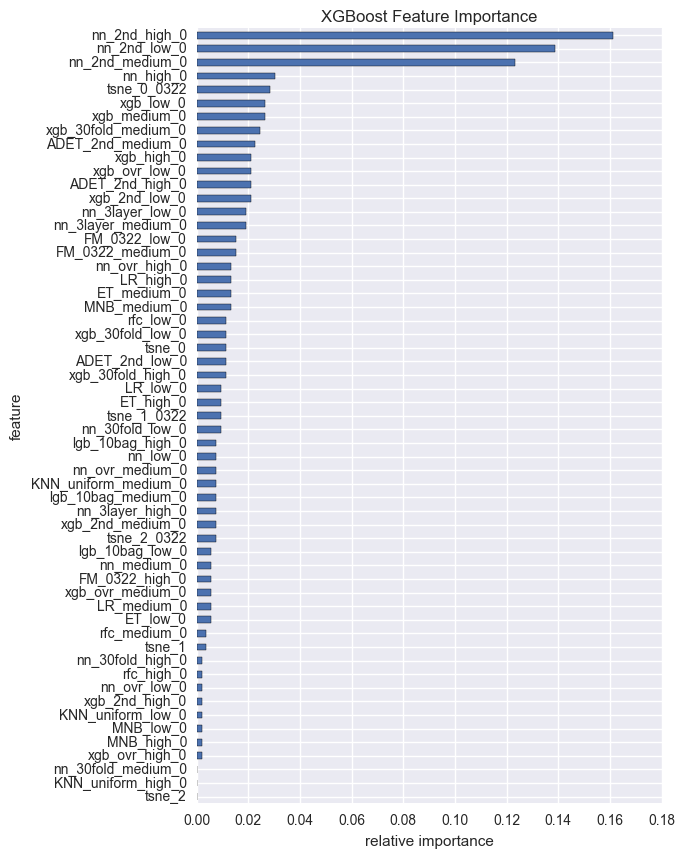

In [36]:
importance = np.vstack((X_train.columns, rgr.feature_importances_))
f_df = pd.DataFrame(importance.T, columns=['feature', 'fscore'])
f_df.fscore = f_df.fscore.astype('float64')
f_df = f_df.sort_values(by = 'fscore',ascending = True)
f_df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

In [38]:
train_X = train_2nd#[feature_to_use]
test_X = test_2nd_mean#[feature_to_use]

print train_X.shape
print test_X.shape

(49352, 57)
(74659, 57)


In [39]:
from bayes_opt import BayesianOptimization

In [40]:
best_score = 1000
for x in [3,4,5,6,7,8,9,10]:
    tmp = cv_train(train_X,train_y,max_depth = x)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[26]	train-mlogloss:0.475123+0.000462242	test-mlogloss:0.487132+0.00232551

3 	0.4871316
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[23]	train-mlogloss:0.465443+0.000688802	test-mlogloss:0.487519+0.00262275

4 	0.4875188
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[24]	train-mlogloss:0.445996+0.00122083	test-mlogloss:0.488714+0.00261302

5 	0.4887138
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[20]	train-mlogloss:0.4265

In [41]:
for x in [1,2]:
    tmp = cv_train(train_X,train_y,max_depth = x)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[100]	train-mlogloss:0.479963+0.000614977	test-mlogloss:0.487555+0.00213867

1 	0.4875548
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[29]	train-mlogloss:0.480075+0.000557687	test-mlogloss:0.486893+0.00211227

2 	0.4868934


In [42]:
# max_depth = train_param
max_depth = train_param
print max_depth

2


In [43]:
train_param = 1
for x in [2,4,8,12,16,20,24,28,32,40,48,64,80,90,100,110,128]:
   
    tmp = cv_train(train_X,train_y,max_depth = max_depth,min_child_weight = x,early_stop = 20)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[34]	train-mlogloss:0.478969+0.000534042	test-mlogloss:0.486853+0.0021537

2 	0.4868532
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[33]	train-mlogloss:0.479248+0.00048618	test-mlogloss:0.486828+0.00221128

4 	0.486828
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[35]	train-mlogloss:0.478897+0.000511405	test-mlogloss:0.486856+0.00221317

8 	0.4868564
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[29]	train-mlogloss:0.480366

In [44]:
min_child_weight = train_param
print min_child_weight

32


In [45]:
train_param = 1
for x in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    tmp = cv_train(train_X,train_y,max_depth = max_depth,min_child_weight = min_child_weight, 
                   colsample_bytree = x,early_stop = 20)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[90]	train-mlogloss:0.47512+0.000657064	test-mlogloss:0.492196+0.00226054

0.1 	0.4921964
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[69]	train-mlogloss:0.475628+0.000562851	test-mlogloss:0.49035+0.00226291

0.2 	0.49035
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[69]	train-mlogloss:0.474356+0.000722812	test-mlogloss:0.489003+0.00217859

0.3 	0.4890034
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[41]	train-mlogloss:0.4

In [46]:
colsample_bytree = train_param
print colsample_bytree

1


In [47]:
train_param = 1
for x in [0.5,0.6,0.7,0.8,0.9]:
    tmp = cv_train(train_X,train_y,max_depth = max_depth,min_child_weight = min_child_weight, 
                   colsample_bytree = colsample_bytree, subsample = x,early_stop = 20)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[30]	train-mlogloss:0.48068+0.000657683	test-mlogloss:0.48765+0.0020044

0.5 	0.4876504
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[30]	train-mlogloss:0.480396+0.000680903	test-mlogloss:0.487473+0.00244281

0.6 	0.4874732
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[29]	train-mlogloss:0.480402+0.000581786	test-mlogloss:0.487045+0.00206436

0.7 	0.4870452
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[32]	train-mlogloss:0.

In [48]:
subsample = train_param
print subsample

1


In [49]:
train_param = 0
for x in [0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0]:
    tmp = cv_train(train_X,train_y,max_depth = max_depth,min_child_weight = min_child_weight, 
                   colsample_bytree = colsample_bytree, subsample = subsample, gamma = x,early_stop = 20)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[33]	train-mlogloss:0.479432+0.000495059	test-mlogloss:0.486685+0.00222599

0.3 	0.486685
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[33]	train-mlogloss:0.479441+0.000492914	test-mlogloss:0.486693+0.00222693

0.6 	0.486693
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[33]	train-mlogloss:0.479443+0.000492662	test-mlogloss:0.486694+0.00222706

0.9 	0.486694
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[34]	train-mlogloss:0.

In [50]:
gamma = train_param
print gamma
# 0.4866446

1.5


In [51]:
rgr = xgb.XGBClassifier(objective = 'multi:softprob',
                       learning_rate = 0.3,
                       n_estimators = 35,
                       max_depth = max_depth, 
                        min_child_weight=min_child_weight,
                        colsample_bytree = colsample_bytree,
                        subsample = subsample,
                        gamma = gamma,
                       nthread = -1)

rgr.fit(X_train,y_train,
        eval_set=[(X_val,y_val)],
        eval_metric='mlogloss',
#         num_class = 3,
        early_stopping_rounds=50,
        verbose=1
       )

[0]	validation_0-mlogloss:0.878789
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:0.752481
[2]	validation_0-mlogloss:0.671898
[3]	validation_0-mlogloss:0.617975
[4]	validation_0-mlogloss:0.581276
[5]	validation_0-mlogloss:0.555525
[6]	validation_0-mlogloss:0.537411
[7]	validation_0-mlogloss:0.524438
[8]	validation_0-mlogloss:0.515015
[9]	validation_0-mlogloss:0.508222
[10]	validation_0-mlogloss:0.503284
[11]	validation_0-mlogloss:0.499567
[12]	validation_0-mlogloss:0.496601
[13]	validation_0-mlogloss:0.494304
[14]	validation_0-mlogloss:0.49256
[15]	validation_0-mlogloss:0.491268
[16]	validation_0-mlogloss:0.490248
[17]	validation_0-mlogloss:0.489359
[18]	validation_0-mlogloss:0.488704
[19]	validation_0-mlogloss:0.488176
[20]	validation_0-mlogloss:0.487864
[21]	validation_0-mlogloss:0.487601
[22]	validation_0-mlogloss:0.487559
[23]	validation_0-mlogloss:0.487277
[24]	validation_0-mlogloss:0.487161
[25]	validation_0-mlogloss:0.487051
[26]	v

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=1.5, learning_rate=0.3, max_delta_step=0, max_depth=2,
       min_child_weight=32, missing=None, n_estimators=35, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

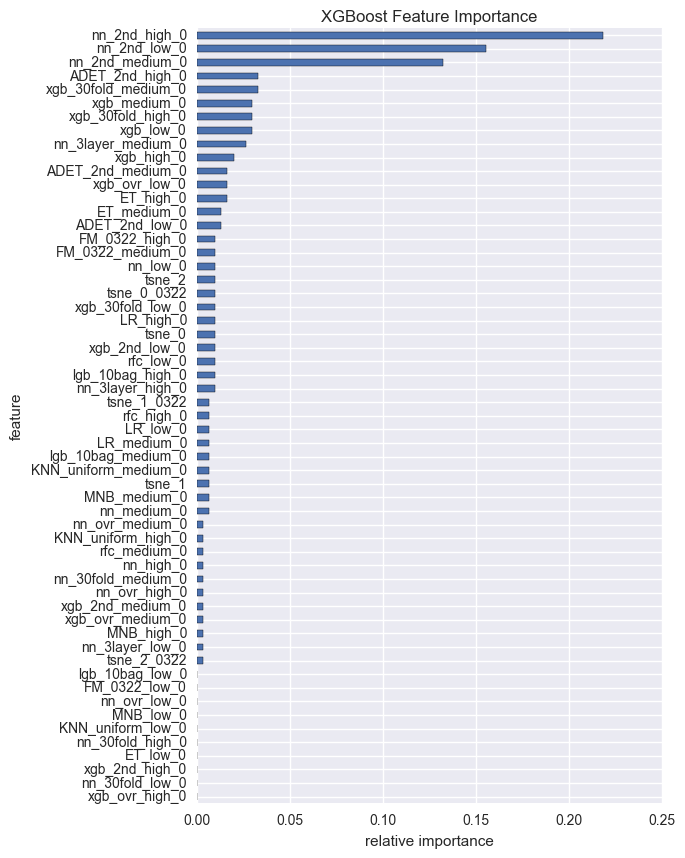

In [52]:
importance = np.vstack((X_train.columns, rgr.feature_importances_))
f_df = pd.DataFrame(importance.T, columns=['feature', 'fscore'])
f_df.fscore = f_df.fscore.astype('float64')
f_df = f_df.sort_values(by = 'fscore',ascending = True)
f_df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

In [56]:
feature_to_use = f_df[f_df.fscore > 1e-5].feature.values

In [57]:
train_X = train_2nd[feature_to_use]
test_X = test_2nd_mean[feature_to_use]

print train_X.shape
print test_X.shape

(49352, 47)
(74659, 47)


In [58]:
best_score = 1000
for x in [1,2,3,4,5,6,7,8,9,10]:
    tmp = cv_train(train_X,train_y,max_depth = x)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[105]	train-mlogloss:0.479816+0.000623034	test-mlogloss:0.487461+0.00214964

1 	0.4874608
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[33]	train-mlogloss:0.479151+0.000526985	test-mlogloss:0.486822+0.00222372

2 	0.4868222
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[31]	train-mlogloss:0.472717+0.000481749	test-mlogloss:0.486879+0.00239128

3 	0.4868788
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[26]	train-mlogloss:0.46

In [59]:
# max_depth = train_param
max_depth = train_param
print max_depth

2


In [60]:
train_param = 1
for x in [2,4,8,12,16,20,24,28,32,40,48,64,80,90,100,110,128]:
   
    tmp = cv_train(train_X,train_y,max_depth = max_depth,min_child_weight = x,early_stop = 20)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[31]	train-mlogloss:0.479728+0.000531433	test-mlogloss:0.486835+0.00220982

2 	0.486835
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[30]	train-mlogloss:0.480055+0.000548649	test-mlogloss:0.486774+0.00225892

4 	0.4867736
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[32]	train-mlogloss:0.479641+0.000489849	test-mlogloss:0.486831+0.00227441

8 	0.4868306
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[31]	train-mlogloss:0.4798

In [61]:
min_child_weight = train_param
print min_child_weight

48


In [62]:
train_param = 1
for x in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    tmp = cv_train(train_X,train_y,max_depth = max_depth,min_child_weight = min_child_weight, 
                   colsample_bytree = x,early_stop = 20)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[128]	train-mlogloss:0.47035+0.000799194	test-mlogloss:0.492027+0.00283931

0.1 	0.4920266
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[85]	train-mlogloss:0.473584+0.000535864	test-mlogloss:0.489809+0.00242974

0.2 	0.489809
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[70]	train-mlogloss:0.475001+0.000386765	test-mlogloss:0.489055+0.00234054

0.3 	0.4890546
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[53]	train-mlogloss:

In [63]:
colsample_bytree = train_param
print colsample_bytree

1


In [64]:
train_param = 1
for x in [0.5,0.6,0.7,0.8,0.9]:
    tmp = cv_train(train_X,train_y,max_depth = max_depth,min_child_weight = min_child_weight, 
                   colsample_bytree = colsample_bytree, subsample = x,early_stop = 20)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[31]	train-mlogloss:0.480597+0.000612633	test-mlogloss:0.487356+0.00243675

0.5 	0.487356
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[30]	train-mlogloss:0.480659+0.000538789	test-mlogloss:0.487267+0.0020368

0.6 	0.4872674
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[28]	train-mlogloss:0.480936+0.000550343	test-mlogloss:0.487122+0.00192694

0.7 	0.4871216
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[29]	train-mlogloss:0

In [65]:
subsample = train_param
print subsample

1


In [66]:
train_param = 0
for x in [0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0]:
    tmp = cv_train(train_X,train_y,max_depth = max_depth,min_child_weight = min_child_weight, 
                   colsample_bytree = colsample_bytree, subsample = subsample, gamma = x,early_stop = 20)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[34]	train-mlogloss:0.479344+0.000491696	test-mlogloss:0.486619+0.00204037

0.3 	0.4866186
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[34]	train-mlogloss:0.479344+0.000491696	test-mlogloss:0.486619+0.00204037

0.6 	0.4866186
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[34]	train-mlogloss:0.479347+0.000491792	test-mlogloss:0.48662+0.00204017

0.9 	0.4866204
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[34]	train-mlogloss:

In [67]:
gamma = train_param
print gamma
# 0.4865786

2.1


In [68]:
train_X.shape

(49352, 47)

In [69]:
xgtrain = xgb.DMatrix(train_X, label=train_y) 

def xgb_evaluate(min_child_weight, colsample_bytree, max_depth, subsample, gamma): #
    params = dict()
    params['objective']='multi:softprob'
    params['eval_metric']='mlogloss',
    params['num_class']=3
    params['silent']=1
    params['eta'] = 0.1
    params['verbose_eval'] = True
    params['min_child_weight'] = int(min_child_weight)
    params['colsample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['max_depth'] = int(max_depth)
    params['subsample'] = max(min(subsample, 1), 0)
    params['gamma'] = max(gamma, 0)
    
    cv_result = xgb.cv(
        params, xgtrain, 
        num_boost_round=10000, nfold=5,
        metrics = 'mlogloss',
        seed=1234,callbacks=[xgb.callback.early_stop(50,verbose=False)]
    )
    
    return -cv_result['test-mlogloss-mean'].values[-1]


xgb_BO = BayesianOptimization(
    xgb_evaluate, 
    {
        'max_depth': (2,5),
        'min_child_weight': (16,80),
        'colsample_bytree': (0.6,1),
        'subsample': (0.9,1),
        'gamma': (1.5,3.5)
    }
)

xgb_BO.maximize(init_points=10, n_iter=50)

Initialization
---------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
    1 | 00m25s |   -0.48686 |             0.8680 |    1.9259 |      2.7643 |            46.7159 |      0.9004 | 
    2 | 00m30s |   -0.48688 |             0.8267 |    1.6061 |      3.5348 |            74.7797 |      0.9085 | 
    3 | 00m30s |   -0.48715 |             0.6890 |    2.1003 |      3.4068 |            69.3425 |      0.9849 | 
    4 | 00m32s |   -0.48673 |             0.8958 |    2.4034 |      3.9050 |            53.6408 |      0.9049 | 
    5 | 00m25s |   -0.48680 |             0.8520 |    2.2182 |      2.4741 |            33.2095 |      0.9506 | 
    6 | 00m36s |   -0.48704 |             0.8542 |    1.6208 |      4.5151 |            33.7904 |      0.9481 | 
    7 | 00m26s |   -0.48690 |             0.8814 |    3.0198 |      2.1897 |      

E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00052284]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.65771789e-05]), 'nit': 4, 'funcalls': 48}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
---------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00010608]), 'nit': 7, 'funcalls': 55}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00027933]), 'nit': 4, 'funcalls': 48}
  " state: %s" % convergence_dict)


   11 | 00m47s |   -0.48693 |             0.8353 |    2.0504 |      2.0275 |            16.1496 |      0.9399 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00041434]), 'nit': 4, 'funcalls': 50}
  " state: %s" % convergence_dict)


   12 | 00m35s |   -0.48696 |             0.8895 |    1.5773 |      2.4133 |            79.9749 |      0.9286 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00207623]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0011716]), 'nit': 6, 'funcalls': 66}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.23680220e-05]), 'nit': 5, 'funcalls': 51}
  " state: %s" % convergence_dict)


   13 | 00m48s |   -0.48688 |             0.9793 |    3.1816 |      4.7608 |            77.6853 |      0.9086 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0003772]), 'nit': 7, 'funcalls': 60}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.76464982e-05]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00013736]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)


   14 | 00m37s |   -0.48684 |             0.9863 |    1.5703 |      2.0660 |            54.5940 |      0.9229 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00101996]), 'nit': 3, 'funcalls': 49}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  6.25274843e-05]), 'nit': 7, 'funcalls': 52}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00048386]), 'nit': 5, 'funcalls': 51}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormal

   15 | 00m37s |   -0.48687 |             0.8938 |    2.2544 |      2.1190 |            28.0885 |      0.9640 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00062011]), 'nit': 8, 'funcalls': 58}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -2.38793016e-05]), 'nit': 8, 'funcalls': 53}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00013554]), 'nit': 8, 'funcalls': 63}
  " state: %s" % convergence_dict)


   16 | 00m42s |   -0.48726 |             0.6718 |    2.0375 |      4.7717 |            55.5008 |      0.9066 | 
   17 | 00m48s |   -0.48684 |             0.9948 |    3.2307 |      4.9978 |            17.6011 |      0.9378 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00164029]), 'nit': 7, 'funcalls': 69}
  " state: %s" % convergence_dict)


   18 | 00m48s |   -0.48687 |             0.9851 |    3.4125 |      3.2997 |            37.9909 |      0.9364 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  4.70508821e-05]), 'nit': 7, 'funcalls': 54}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00404545]), 'nit': 7, 'funcalls': 53}
  " state: %s" % convergence_dict)


   19 | 00m42s |   -0.48671 |             0.9669 |    3.3244 |      2.0761 |            22.0171 |      0.9170 | 
   20 | 00m37s |   -0.48675 |             0.9842 |    1.9061 |      2.2251 |            36.1151 |      0.9149 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.32669229e-05]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  2.88619194e-05]), 'nit': 8, 'funcalls': 69}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00604162]), 'nit': 8, 'funcalls': 61}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abn

   21 | 00m37s |   -0.48678 |             0.9156 |    2.8423 |      2.2380 |            32.7587 |      0.9316 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00186187]), 'nit': 5, 'funcalls': 48}
  " state: %s" % convergence_dict)


   22 | 00m36s |   -0.48722 |             0.6962 |    3.4066 |      2.3563 |            51.5845 |      0.9132 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00054199]), 'nit': 4, 'funcalls': 51}
  " state: %s" % convergence_dict)


   23 | 00m42s |   -0.48684 |             0.9865 |    1.9665 |      3.6513 |            63.9726 |      0.9823 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  6.58938801e-05]), 'nit': 5, 'funcalls': 52}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00051322]), 'nit': 6, 'funcalls': 65}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00014415]), 'nit': 7, 'funcalls': 56}
  " state: %s" % convergence_dict)


   24 | 00m42s |   -0.48686 |             0.9758 |    1.7874 |      3.9458 |            52.1313 |      0.9366 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00133112]), 'nit': 4, 'funcalls': 69}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00594687]), 'nit': 7, 'funcalls': 53}
  " state: %s" % convergence_dict)


   25 | 00m44s |   -0.48695 |             0.9958 |    2.6862 |      3.7771 |            54.6889 |      0.9426 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00143008]), 'nit': 3, 'funcalls': 64}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.58432313e-05]), 'nit': 8, 'funcalls': 57}
  " state: %s" % convergence_dict)


   26 | 00m48s |   -0.48694 |             0.8731 |    1.6467 |      4.2494 |            19.5239 |      0.9565 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00041391]), 'nit': 5, 'funcalls': 52}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00105564]), 'nit': 7, 'funcalls': 53}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00104931]), 'nit': 7, 'funcalls': 53}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally wi

   27 | 00m47s |   -0.48680 |             0.9495 |    3.0691 |      3.6300 |            31.5943 |      0.9052 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0009441]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)


   28 | 00m47s |   -0.48717 |             0.8110 |    2.0147 |      4.5877 |            46.5222 |      0.9340 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00150458]), 'nit': 7, 'funcalls': 53}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00011629]), 'nit': 7, 'funcalls': 52}
  " state: %s" % convergence_dict)


   29 | 00m38s |   -0.48688 |             0.8210 |    3.4562 |      2.0535 |            61.6302 |      0.9142 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00418438]), 'nit': 3, 'funcalls': 50}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00110724]), 'nit': 7, 'funcalls': 65}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  6.00086933e-05]), 'nit': 7, 'funcalls': 53}
  " state: %s" % convergence_dict)


   30 | 00m44s |   -0.48687 |             0.9833 |    2.7428 |      3.1873 |            75.4642 |      0.9615 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00016399]), 'nit': 6, 'funcalls': 48}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00086216]), 'nit': 5, 'funcalls': 50}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00068714]), 'nit': 8, 'funcalls': 87}
  " state: %s" % convergence_dict)


   31 | 00m38s |   -0.48673 |             0.9343 |    3.0773 |      2.1279 |            19.1886 |      0.9437 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00060899]), 'nit': 7, 'funcalls': 53}
  " state: %s" % convergence_dict)


   32 | 00m46s |   -0.48694 |             0.9459 |    2.3030 |      4.6543 |            66.9264 |      0.9188 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00118261]), 'nit': 8, 'funcalls': 57}
  " state: %s" % convergence_dict)


   33 | 00m45s |   -0.48693 |             0.7601 |    3.1356 |      3.2109 |            21.7779 |      0.9345 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00104147]), 'nit': 5, 'funcalls': 51}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.94483982e-05]), 'nit': 9, 'funcalls': 68}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -9.33664960e-05]), 'nit': 7, 'funcalls': 74}
  " state: %s" % convergence_dict)


   34 | 00m38s |   -0.48687 |             0.8334 |    2.3286 |      2.1479 |            60.6549 |      0.9061 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00085878]), 'nit': 5, 'funcalls': 52}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00189786]), 'nit': 4, 'funcalls': 52}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00138954]), 'nit': 4, 'funcalls': 54}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally wi

   35 | 00m37s |   -0.48678 |             0.9521 |    1.6611 |      2.6915 |            42.0636 |      0.9277 | 
   36 | 00m37s |   -0.48751 |             0.6009 |    1.6340 |      2.7644 |            64.0124 |      0.9264 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00182031]), 'nit': 4, 'funcalls': 51}
  " state: %s" % convergence_dict)


   37 | 00m49s |   -0.48705 |             0.9184 |    1.9345 |      4.4410 |            61.1344 |      0.9763 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.0013709]), 'nit': 4, 'funcalls': 51}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  4.63567809e-05]), 'nit': 7, 'funcalls': 70}
  " state: %s" % convergence_dict)


   38 | 00m40s |   -0.48674 |             0.9586 |    3.2140 |      2.0216 |            44.4950 |      0.9217 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00018475]), 'nit': 2, 'funcalls': 45}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  9.24230044e-05]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00022631]), 'nit': 6, 'funcalls': 54}
  " state: %s" % convergence_dict)


   39 | 00m39s |   -0.48681 |             0.9086 |    2.3103 |      2.0265 |            19.9548 |      0.9109 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00246967]), 'nit': 4, 'funcalls': 51}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00559641]), 'nit': 5, 'funcalls': 51}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00478205]), 'nit': 6, 'funcalls': 49}
  " state: %s" % convergence_dict)


   40 | 00m48s |   -0.48707 |             0.9892 |    1.6355 |      4.7235 |            69.6229 |      0.9216 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00016162]), 'nit': 7, 'funcalls': 86}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  2.30649312e-05]), 'nit': 6, 'funcalls': 59}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  5.39597531e-05]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)


   41 | 00m38s |   -0.48684 |             0.9823 |    3.1956 |      2.6260 |            61.3718 |      0.9937 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00069902]), 'nit': 5, 'funcalls': 47}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00150128]), 'nit': 5, 'funcalls': 62}
  " state: %s" % convergence_dict)


   42 | 00m42s |   -0.48687 |             0.9759 |    2.1409 |      3.4970 |            37.6136 |      0.9449 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00031303]), 'nit': 4, 'funcalls': 51}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00013501]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00037738]), 'nit': 2, 'funcalls': 45}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally wi

   43 | 00m41s |   -0.48667 |             0.9994 |    3.2040 |      2.7368 |            18.3297 |      0.9199 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00010246]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00211026]), 'nit': 5, 'funcalls': 58}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -5.65424036e-05]), 'nit': 2, 'funcalls': 45}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormal

   44 | 00m44s |   -0.48691 |             0.9479 |    2.7736 |      3.1535 |            26.1552 |      0.9408 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00014781]), 'nit': 7, 'funcalls': 86}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00028881]), 'nit': 5, 'funcalls': 58}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00331184]), 'nit': 3, 'funcalls': 46}
  " state: %s" % convergence_dict)


   45 | 00m48s |   -0.48704 |             0.9989 |    3.3365 |      4.5834 |            63.3593 |      0.9362 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00014873]), 'nit': 7, 'funcalls': 59}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -2.36321144e-05]), 'nit': 5, 'funcalls': 58}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00161557]), 'nit': 4, 'funcalls': 51}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormal

   46 | 00m42s |   -0.48688 |             0.9012 |    1.5166 |      2.7673 |            31.4831 |      0.9254 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01149776]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)


   47 | 00m50s |   -0.48694 |             0.9869 |    3.0925 |      4.2049 |            19.9012 |      0.9153 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00021818]), 'nit': 6, 'funcalls': 50}
  " state: %s" % convergence_dict)


   48 | 00m51s |   -0.48679 |             0.8925 |    3.1597 |      4.3113 |            16.9614 |      0.9135 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0150913]), 'nit': 5, 'funcalls': 52}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00010558]), 'nit': 6, 'funcalls': 71}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00011685]), 'nit': 6, 'funcalls': 63}
  " state: %s" % convergence_dict)


   49 | 00m39s |   -0.48690 |             0.9573 |    2.3592 |      2.1144 |            75.3964 |      0.9910 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0005095]), 'nit': 6, 'funcalls': 63}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -6.28971093e-05]), 'nit': 6, 'funcalls': 50}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00030618]), 'nit': 7, 'funcalls': 53}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormall

   50 | 00m42s |   -0.48674 |             0.9974 |    3.4084 |      2.2837 |            30.0310 |      0.9667 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00011101]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00030995]), 'nit': 7, 'funcalls': 53}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.59251504e-05]), 'nit': 9, 'funcalls': 64}
  " state: %s" % convergence_dict)


   51 | 00m39s |   -0.48697 |             0.9136 |    2.4430 |      2.2133 |            69.0996 |      0.9625 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -3.35336802e-05]), 'nit': 5, 'funcalls': 55}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.01992562]), 'nit': 3, 'funcalls': 46}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  8.38316619e-05]), 'nit': 8, 'funcalls': 71}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abn

   52 | 00m46s |   -0.48676 |             0.9882 |    2.0412 |      3.3095 |            30.2197 |      0.9401 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.87349506e-05]), 'nit': 5, 'funcalls': 52}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00011139]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01314848]), 'nit': 3, 'funcalls': 50}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormal

   53 | 00m35s |   -0.48676 |             0.9475 |    3.3994 |      2.2737 |            32.7315 |      0.9611 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  3.63721047e-05]), 'nit': 4, 'funcalls': 51}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.33709473e-05]), 'nit': 4, 'funcalls': 47}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  3.58032339e-05]), 'nit': 8, 'funcalls': 55}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminate

   54 | 00m43s |   -0.48693 |             0.8937 |    2.5388 |      3.0497 |            27.3821 |      0.9461 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00068777]), 'nit': 3, 'funcalls': 46}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -2.26404518e-05]), 'nit': 6, 'funcalls': 67}
  " state: %s" % convergence_dict)


   55 | 00m44s |   -0.48685 |             0.8900 |    1.5013 |      2.8051 |            22.9658 |      0.9253 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00046663]), 'nit': 6, 'funcalls': 58}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00016705]), 'nit': 8, 'funcalls': 81}
  " state: %s" % convergence_dict)


   56 | 00m45s |   -0.48685 |             0.8575 |    2.3345 |      3.5195 |            63.8164 |      0.9792 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00866494]), 'nit': 6, 'funcalls': 61}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00318959]), 'nit': 6, 'funcalls': 54}
  " state: %s" % convergence_dict)


   57 | 00m48s |   -0.48704 |             0.7771 |    1.9136 |      4.2089 |            74.9440 |      0.9466 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.000176]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.27207295e-05]), 'nit': 8, 'funcalls': 64}
  " state: %s" % convergence_dict)


   58 | 00m55s |   -0.48711 |             0.9343 |    2.4096 |      4.1730 |            18.0000 |      0.9753 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  2.81762332e-05]), 'nit': 4, 'funcalls': 51}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00018859]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -2.97259539e-05]), 'nit': 6, 'funcalls': 50}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abn

   59 | 00m45s |   -0.48682 |             0.9308 |    3.3471 |      2.9876 |            44.2218 |      0.9924 | 


E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00012368]), 'nit': 5, 'funcalls': 53}
  " state: %s" % convergence_dict)
E:\junxiao\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0003024]), 'nit': 6, 'funcalls': 68}
  " state: %s" % convergence_dict)


   60 | 00m35s |   -0.48728 |             0.6469 |    2.6809 |      2.1334 |            28.8427 |      0.9281 | 


In [70]:
xgb_bo_scores = pd.DataFrame([[s[0]['max_depth'],
                               s[0]['min_child_weight'],
                               s[0]['colsample_bytree'],
                               s[0]['subsample'],
                               s[0]['gamma'],
                               s[1]] for s in zip(xgb_BO.res['all']['params'],xgb_BO.res['all']['values'])],
                            columns = ['max_depth',
                                       'min_child_weight',
                                       'colsample_bytree',
                                       'subsample',
                                       'gamma',
                                       'score'])
xgb_bo_scores=xgb_bo_scores.sort_values('score',ascending=False)
xgb_bo_scores.head(10)

,max_depth,min_child_weight,colsample_bytree,subsample,gamma,score
32,2.736770,18.329668,0.999398,0.919896,3.203952,-0.486672
8,2.076111,22.017092,0.966925,0.916996,3.324430,-0.486715
20,2.127897,19.188622,0.934339,0.943733,3.077314,-0.486730
39,2.283674,30.031017,0.997413,0.966672,3.408385,-0.486737
27,2.021633,44.495002,0.958550,0.921678,3.214033,-0.486738
9,2.225091,36.115089,0.984206,0.914885,1.906076,-0.486748
41,3.309528,30.219740,0.988180,0.940066,2.041178,-0.486759
42,2.273748,32.731528,0.947515,0.961102,3.399370,-0.486762
24,2.691545,42.063572,0.952140,0.927727,1.661082,-0.486780
10,2.238012,32.758717,0.915578,0.931645,2.842265,-0.486783


In [71]:
cv_train(train_X,train_y,max_depth = 2,min_child_weight = 48,colsample_bytree = 1, subsample = 1, gamma = 2.1 ,
         verbose_eval = None, seed = 1234, early_stop = 50, nfold = 5, eta=0.1)

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[98]	train-mlogloss:0.480062+0.00133076	test-mlogloss:0.486875+0.00508273



0.48687459999999999

In [72]:
def xgb_blend(estimators, train_x, train_y, test_x, fold, early_stopping_rounds=0,randomseed=1234):
    fold_start = time.time() 
    N_params = len(estimators)
#     print ("Blend %d estimators for %d folds" % (N_params, fold))
    skf = KFold(n_splits=fold,shuffle=True,random_state=randomseed)
    N_class = len(set(train_y))
        
    train_blend_x = np.zeros((train_x.shape[0], N_class*N_params))
    test_blend_x_mean = np.zeros((test_x.shape[0], N_class*N_params))
    test_blend_x_gmean = np.zeros((test_x.shape[0], N_class*N_params))
    scores = np.zeros ((fold,N_params))
    best_rounds = np.zeros ((fold, N_params))
    
    for j, est in enumerate(estimators):
        est.set_params(objective = 'multi:softprob')
        est.set_params(silent = False)
        est.set_params(learning_rate = 0.02)
        est.set_params(n_estimators=100000)
        
#         print ("Model %d: %s" %(j+1, est))

        test_blend_x_j = np.zeros((test_x.shape[0], N_class*fold))
    
        for i, (train_index, val_index) in enumerate(skf.split(train_x)):
#             print ("Model %d fold %d" %(j+1,i+1))
            
            train_x_fold = train_x.iloc[train_index]
            train_y_fold = train_y[train_index]
            val_x_fold = train_x.iloc[val_index]
            val_y_fold = train_y[val_index]      

            est.fit(train_x_fold,train_y_fold,
                    eval_set = [(val_x_fold, val_y_fold)],
                    eval_metric = 'mlogloss',
                    early_stopping_rounds=early_stopping_rounds,
                    verbose=False)
            best_round=est.best_iteration
            best_rounds[i,j]=best_round
#             print ("best round %d" % (best_round))
            val_y_predict_fold = est.predict_proba(val_x_fold,ntree_limit=best_round)
            score = log_loss(val_y_fold, val_y_predict_fold)
#             print "Score: ", score
            scores[i,j]=score
            train_blend_x[val_index, (j*N_class):(j+1)*N_class] = val_y_predict_fold
            
            test_blend_x_j[:,(i*N_class):(i+1)*N_class] = est.predict_proba(test_x,ntree_limit=best_round)
#             print ("Model %d fold %d fitting finished in %0.3fm" % (j+1,i+1, )
            
        test_blend_x_mean[:,(j*N_class):(j+1)*N_class] = \
                np.stack([test_blend_x_j[:,range(0,N_class*fold,N_class)].mean(1),
                          test_blend_x_j[:,range(1,N_class*fold,N_class)].mean(1),
                          test_blend_x_j[:,range(2,N_class*fold,N_class)].mean(1)]).T

            
#         print ("Score for model %d is %f" % (j+1,np.mean(scores[:,j])))
    print "Score models is %f fitting finished in %0.3fm" % (np.mean(scores),(time.time() - fold_start)/60)
    return (train_blend_x, test_blend_x_mean, test_blend_x_gmean, scores,best_rounds)


In [73]:
train_total = np.zeros((train_2nd.shape[0], 3))
test_total = np.zeros((test_2nd_mean.shape[0], 3))
name_train_blend = '../tmp/train_3rdxgb.csv'
name_test_blend = '../tmp/test_3rdxgb.csv'
score_total = 0
count = 200
print 'Starting ..........'
for n in range(count):
    print n
    randomseed = n+1000
    estimators = [
                 xgb.XGBClassifier(max_depth = 2,
                                  min_child_weight = 18,
                                  colsample_bytree = 0.999398,
                                  subsample = 0.919896,
                                  gamma = 3.203952),  
                 ]
# 		max_depth	min_child_weight	colsample_bytree	subsample	gamma	score
# 32	2.736770	18.329668			0.999398			0.919896	3.203952	-0.486672

    (train_blend_x_xgb,
     test_blend_x_xgb_mean,
     test_blend_x_xgb_gmean,
     blend_scores_xgb,
     best_rounds_xgb) = xgb_blend(estimators,
                                  train_X,train_y,
                                  test_X,
                                  5,
                                  500,randomseed)
    train_total += train_blend_x_xgb
    test_total += test_blend_x_xgb_mean
    score_total += np.mean(blend_scores_xgb)

    np.savetxt(name_train_blend,train_total, delimiter=",")
    np.savetxt(name_test_blend,test_total, delimiter=",")
    
train_total = train_total / count
test_total = test_total / count
score_total = score_total / count

Starting ..........
0
Score models is 0.486575 fitting finished in 3.037m
1
Score models is 0.486691 fitting finished in 3.055m
2
Score models is 0.486956 fitting finished in 3.132m
3
Score models is 0.486517 fitting finished in 3.421m
4
Score models is 0.486469 fitting finished in 3.202m
5
Score models is 0.486582 fitting finished in 3.369m
6
Score models is 0.486724 fitting finished in 3.585m
7
Score models is 0.486771 fitting finished in 3.041m
8
Score models is 0.486412 fitting finished in 3.092m
9
Score models is 0.486348 fitting finished in 3.193m
10
Score models is 0.486618 fitting finished in 3.220m
11
Score models is 0.486577 fitting finished in 2.897m
12
Score models is 0.486665 fitting finished in 3.092m
13
Score models is 0.486882 fitting finished in 3.026m
14
Score models is 0.486542 fitting finished in 3.320m
15
Score models is 0.486667 fitting finished in 2.955m
16
Score models is 0.486588 fitting finished in 3.395m
17
Score models is 0.486585 fitting finished in 2.993m


In [74]:
now = datetime.now()

name_train_blend = '../blend/train_blend_3rdXGB_BM_200bagging_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'
name_test_blend_mean = '../blend/test_blend_3rdXGB_BM_200bagging_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'


print score_total
# print (np.mean(best_rounds_RFC,axis=0))
np.savetxt(name_train_blend,train_total, delimiter=",")
np.savetxt(name_test_blend_mean,test_total, delimiter=",")

0.486596716598


In [75]:
# now = datetime.now()
data_path = "../input/"
test_X_0322 = pd.read_csv(data_path + 'test_BM_MB_add03052240.csv')

sub_name = '../output/sub_3rdXGB_last_200bagging_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'

out_df = pd.DataFrame(test_total)
out_df.columns = ["low", "medium", "high"]
out_df["listing_id"] = test_X_0322.listing_id.values
out_df.to_csv(sub_name, index=False)

In [ ]:
#